# Models and Maps

## Models

Let's again consider the car dataset from second notebook.

In that notebook we plotted *qsec* as a function of *hp*. However we might be interested a better model. Let's load the data.

In [55]:
library(tidyverse)

data(mtcars)

mtcars_tbl <- as_tibble(rownames_to_column(mtcars,var='model'))

str(mtcars_tbl)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	32 obs. of  12 variables:
 $ model: chr  "Mazda RX4" "Mazda RX4 Wag" "Datsun 710" "Hornet 4 Drive" ...
 $ mpg  : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl  : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp : num  160 160 108 258 360 ...
 $ hp   : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat : num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt   : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec : num  16.5 17 18.6 19.4 17 ...
 $ vs   : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am   : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear : num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb : num  4 4 1 1 2 1 4 2 2 4 ...


Now let's fit three different linear models with `lm` from `stats`-package [[lm]](https://www.rdocumentation.org/packages/stats/versions/3.4.3/topics/lm).

First model will be `qsec ~ wt`, while second will be `qsec ~ hp`. Let's combine both of these effects into a third model `qsec ~ hp / wt`.

`summary` will show a summary of the model.

In [56]:
lm1_model <- function(data) lm(qsec ~ wt,      data=data)
lm2_model <- function(data) lm(qsec ~ hp,      data=data)
lm3_model <- function(data) lm(qsec ~ hp / wt, data=data)

summary(lm1_model(mtcars_tbl))
summary(lm2_model(mtcars_tbl))
summary(lm3_model(mtcars_tbl))


Call:
lm(formula = qsec ~ wt, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3638 -1.0766  0.2051  0.8655  5.0298 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  18.8753     1.1025  17.120   <2e-16 ***
wt           -0.3191     0.3283  -0.972    0.339    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.789 on 30 degrees of freedom
Multiple R-squared:  0.03053,	Adjusted R-squared:  -0.00179 
F-statistic: 0.9446 on 1 and 30 DF,  p-value: 0.3389



Call:
lm(formula = qsec ~ hp, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1766 -0.6975  0.0348  0.6520  4.0972 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 20.556354   0.542424  37.897  < 2e-16 ***
hp          -0.018458   0.003359  -5.495 5.77e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.282 on 30 degrees of freedom
Multiple R-squared:  0.5016,	Adjusted R-squared:  0.485 
F-statistic: 30.19 on 1 and 30 DF,  p-value: 5.766e-06



Call:
lm(formula = qsec ~ hp/wt, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8659 -0.4913 -0.0812  0.3969  3.9757 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 21.387927   0.546219  39.156  < 2e-16 ***
hp          -0.041773   0.008020  -5.208 1.42e-05 ***
hp:wt        0.005028   0.001608   3.127    0.004 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.128 on 29 degrees of freedom
Multiple R-squared:  0.6272,	Adjusted R-squared:  0.6015 
F-statistic:  24.4 on 2 and 29 DF,  p-value: 6.103e-07


One can add arbitrary amount of terms into these models. There's plenty of other models in R libraries one might want to use.

# Nesting

Let's say we want to calculate the same models for each group specified by a cylinder. 

This means we need to do iteration over the groups and for this to work, we should split the data into chunks that will be iterated over. 

To do this we can use the `nest`-function ([[nest]](http://tidyr.tidyverse.org/reference/nest.html)).

In [57]:
mtcars_nested <- mtcars_tbl %>%
    # Convert cyl into a factor
    mutate_at(vars(cyl),as.factor) %>%
    # Group by cyl
    group_by(cyl) %>%
    # Nest the data
    nest()

print(mtcars_nested)

# A tibble: 3 x 2
  cyl   data              
  <fct> <list>            
1 6     <tibble [7 × 11]> 
2 4     <tibble [11 × 11]>
3 8     <tibble [14 × 11]>


This produces a `tibble` where all data is stored in a column of a type `list` and name *data*.

## Maps

Now that we have our list to iterate over, we can use `map` to do the iteration.

`map` is provided by the purrr-package. There are variants of it based on the return value of the used function. 

In this case we receive the results for a model (that are a list), so we want to use the `map`-function that creates a list from the outputs [[map]](http://purrr.tidyverse.org/reference/map.html).

In [58]:
# Map each data to model, pipe resulting fits to summary-function
map(mtcars_nested$data,lm3_model) %>%
    map(summary)

[[1]]

Call:
lm(formula = qsec ~ hp/wt, data = data)

Residuals:
      1       2       3       4       5       6       7 
-0.2463 -0.5001  0.8347  0.7807 -0.8807 -0.2807  0.2923 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 20.531267   1.855883  11.063  0.00038 ***
hp          -0.110793   0.023113  -4.793  0.00869 ** 
hp:wt        0.029015   0.008187   3.544  0.02392 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7995 on 4 degrees of freedom
Multiple R-squared:  0.8537,	Adjusted R-squared:  0.7806 
F-statistic: 11.67 on 2 and 4 DF,  p-value: 0.0214


[[2]]

Call:
lm(formula = qsec ~ hp/wt, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.90046 -0.63004  0.06546  0.66804  1.98746 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 20.686326   1.626110  12.721 1.37e-06 ***
hp          -0.076533   0.028019  -2.732   0.0258 *  
hp:wt        0.025052

A more *tidyverse*-approach to using the `map` is to use it with `mutate` to store the fits into a new columns. This makes it easy to run multiple models and store their results.

In [70]:
run_models <- function(data) {
    output <- list(lm1_model(data),lm2_model(data),lm3_model(data))
}

mtcars_nested <- mtcars_nested %>%
    mutate(
        models=map(.$data, run_models)
    )

# Check structure
print(mtcars_nested)

# Check output
map(mtcars_nested$models[[1]],summary)

# A tibble: 3 x 3
  cyl   data               models    
  <fct> <list>             <list>    
1 6     <tibble [7 × 11]>  <list [3]>
2 4     <tibble [11 × 11]> <list [3]>
3 8     <tibble [14 × 11]> <list [3]>


[[1]]

Call:
lm(formula = qsec ~ wt, data = data)

Residuals:
       1        2        3        4        5        6        7 
 0.54495  0.04724  1.05696  0.82073 -1.01632 -0.41632 -1.03723 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)    5.048      3.358   1.503   0.1931  
wt             4.148      1.071   3.872   0.0117 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9351 on 5 degrees of freedom
Multiple R-squared:  0.7499,	Adjusted R-squared:  0.6999 
F-statistic: 14.99 on 1 and 5 DF,  p-value: 0.01174


[[2]]

Call:
lm(formula = qsec ~ hp, data = data)

Residuals:
      1       2       3       4       5       6       7 
-2.0600 -1.5000  0.9200  1.4791  0.3544  0.9544 -0.1480 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 23.38027    3.04430   7.680 0.000597 ***
hp          -0.04418    0.02449  -1.805 0.130992    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’

One can use `mutate` and `map` with e.g. `coefficients` or `residuals` to extract properties from the models [[coefficients]](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/coef.html) [[residuals]](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/residuals.html).

In [73]:
get_coefficients <- function(models) {
    output <- map_dbl(models,~coefficients(.)[[1]])
}

mtcars_nested <- mtcars_nested %>%
    mutate(
        coefficients=map(models,get_coefficients)
    )

print(mtcars_nested)

# A tibble: 3 x 4
  cyl   data               models     coefficients
  <fct> <list>             <list>     <list>      
1 6     <tibble [7 × 11]>  <list [3]> <dbl [3]>   
2 4     <tibble [11 × 11]> <list [3]> <dbl [3]>   
3 8     <tibble [14 × 11]> <list [3]> <dbl [3]>   


ERROR: Error: All nested columns must have the same number of elements.


# A tibble: 3 x 8
  cyl   data       lm1_fit  lm2_fit lm3_fit lm1_1st_coeffici… lm2_1st_coeffici…
  <fct> <list>     <list>   <list>  <list>              <dbl>             <dbl>
1 6     <tibble [… <S3: lm> <S3: l… <S3: l…              5.05              23.4
2 4     <tibble [… <S3: lm> <S3: l… <S3: l…             14.8               20.3
3 8     <tibble [… <S3: lm> <S3: l… <S3: l…             13.4               20.5
# ... with 1 more variable: lm3_1st_coefficient <dbl>


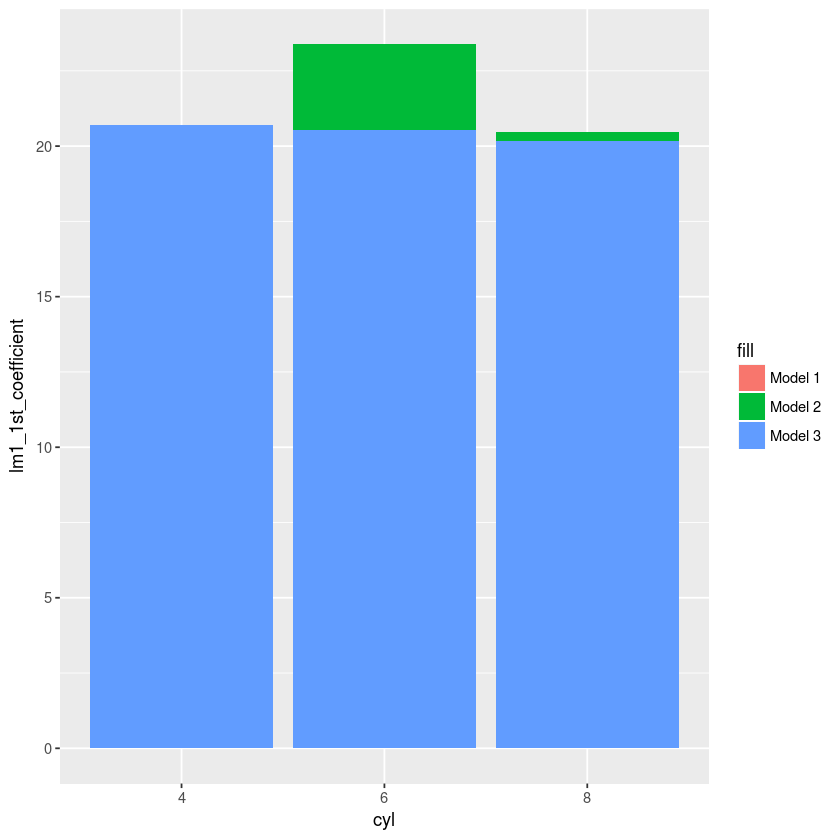

In [50]:
mtcars_nested %>%
    ggplot(aes(x=cyl,y=),position='dodge')

print(mtcars_nested)

A 

# A tibble: 3 x 8
  cyl   data       lm1_fit  lm2_fit lm3_fit lm1_1st_coeffici… lm2_1st_coeffici…
  <fct> <list>     <list>   <list>  <list>              <dbl>             <dbl>
1 6     <tibble [… <S3: lm> <S3: l… <S3: l…              5.05              23.4
2 4     <tibble [… <S3: lm> <S3: l… <S3: l…             14.8               20.3
3 8     <tibble [… <S3: lm> <S3: l… <S3: l…             13.4               20.5
# ... with 1 more variable: lm3_1st_coefficient <dbl>


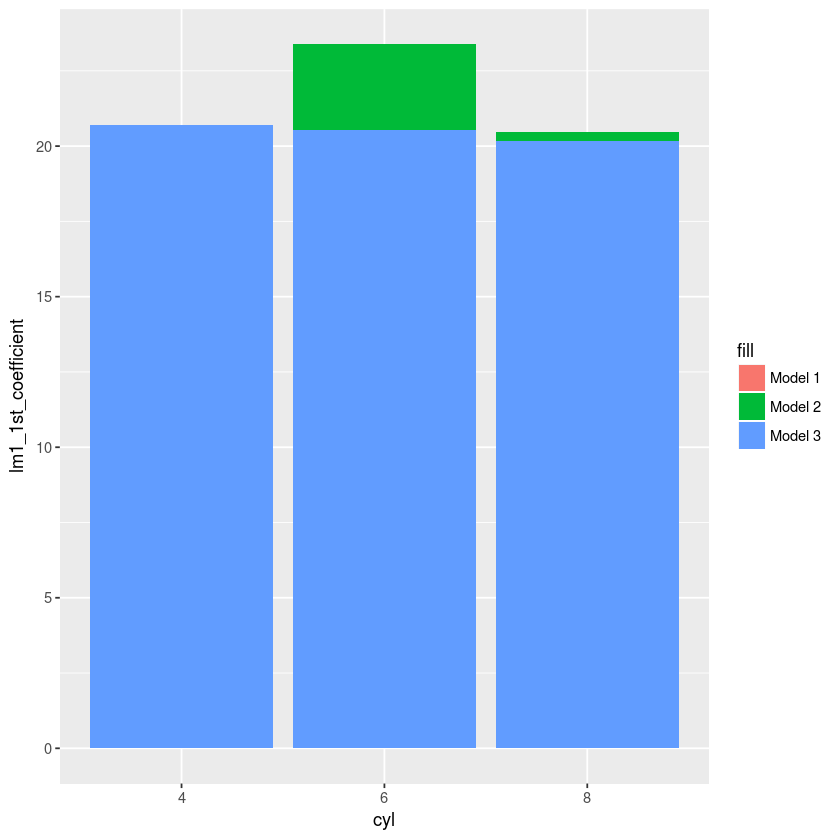

In [50]:
mtcars_nested %>%
    ggplot(aes(x=cyl,y=),position='dodge')

print(mtcars_nested)

# A tibble: 3 x 8
  cyl   data       lm1_fit  lm2_fit lm3_fit lm1_1st_coeffici… lm2_1st_coeffici…
  <fct> <list>     <list>   <list>  <list>              <dbl>             <dbl>
1 6     <tibble [… <S3: lm> <S3: l… <S3: l…              5.05              23.4
2 4     <tibble [… <S3: lm> <S3: l… <S3: l…             14.8               20.3
3 8     <tibble [… <S3: lm> <S3: l… <S3: l…             13.4               20.5
# ... with 1 more variable: lm3_1st_coefficient <dbl>


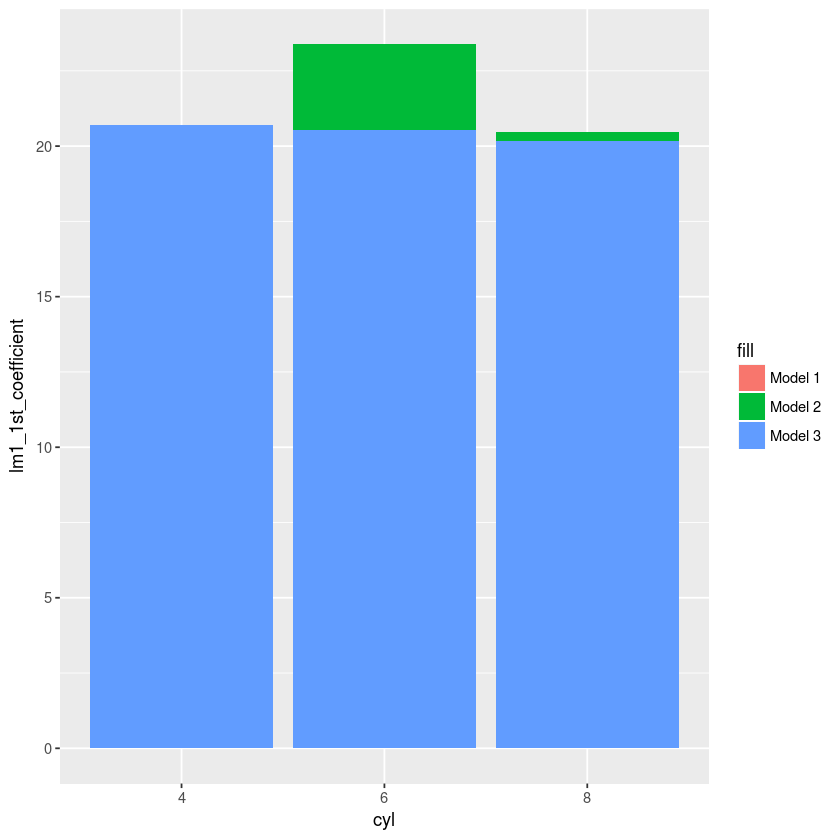

In [50]:
mtcars_nested %>%
    ggplot(aes(x=cyl,y=),position='dodge')

print(mtcars_nested)